In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [30]:
filePath = "../data/merged_ECvessel_hurricane_sep20_23.csv"
df = pd.read_csv(filePath)

In [31]:
df.head(5)

,Unnamed: 0_x,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,...,50-knot Wind Radii NE,50-knot Wind Radii SE,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime
0,0,353274000.0,2020-09-01 00:00:00,31.16356,-79.87955,12.6,267.9,262.0,NYK DAEDALUS,IMO9337614,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-09-01 00:00:00
1,1,538008722.0,2020-09-01 00:00:00,40.45438,-69.22300,12.3,90.0,94.0,FULMAR,IMO9402471,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-09-01 00:00:00
2,2,368660000.0,2020-09-01 00:00:00,36.79857,-75.74077,14.7,117.7,116.0,MAERSK IDAHO,IMO9193264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-09-01 00:00:00
3,3,309046000.0,2020-09-01 00:00:00,30.34880,-79.34123,12.5,329.3,328.0,MOL CREATION,IMO9321237,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-09-01 00:00:00
4,4,218158000.0,2020-09-01 00:00:00,28.20606,-79.78330,12.0,181.0,181.0,BREMEN EXPRESS,IMO9343728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2020-09-01 00:00:00


In [32]:
df.shape

(99263, 43)

In [33]:
print(df.columns)
print(df.dtypes)

Index(['Unnamed: 0_x', 'MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG',
       'Heading', 'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'TransceiverClass', 'Unnamed: 0_y',
       'Name', 'Num Entries', 'Year', 'Time', 'Record Identifier',
       'Status of System', 'Latitude', 'Longitude', 'Maximum Sustained Wind',
       'Minimum Pressure', '34-knot Wind Radii NE', '34-knot Wind Radii SE',
       '34-knot Wind Radii SW', '34-knot Wind Radii NW',
       '50-knot Wind Radii NE', '50-knot Wind Radii SE',
       '50-knot Wind Radii SW', '50-knot Wind Radii NW',
       '64-knot Wind Radii NE', '64-knot Wind Radii SE',
       '64-knot Wind Radii SW', '64-knot Wind Radii NW', 'Speed mph',
       'hurricane_datetime'],
      dtype='object')
Unnamed: 0_x                int64
MMSI                      float64
BaseDateTime               object
LAT                       float64
LON                       float64
SOG                       fl

In [34]:
df['BaseDateTime'] = pd.to_datetime(df['BaseDateTime'])
df = df.sort_values(by=['MMSI', 'BaseDateTime']).reset_index(drop=True)  # Sort the data by vessel and timestamp
labels = []
cog_diffs = []

for i in range(1, len(df)):
    curr_vessel = df.loc[i, 'MMSI']
    prev_vessel = df.loc[i - 1, 'MMSI']
    time_diff = df.loc[i, 'BaseDateTime'] - df.loc[i - 1, 'BaseDateTime']

    if (curr_vessel == prev_vessel) and (time_diff <= pd.Timedelta('1D')):
        prev_cog = df.loc[i - 1, 'COG']
        curr_cog = df.loc[i, 'COG']
        cog_diff = abs(curr_cog - prev_cog)
        curr_sog = df.loc[i, 'SOG']

        cog_diffs.append(cog_diff)
        if curr_sog == 0:
            labels.append('stopped')
        elif abs(cog_diff - 180) <= 10:
            labels.append('turned around')
        elif cog_diff > 15:
            labels.append('veered off course')
        else:
            labels.append('stayed on course')
    else:
        labels.append('stayed on course')

if df.loc[0, 'SOG'] == 0:
    labels.insert(0, 'stopped')
else:
    labels.insert(0, 'stayed on course')

df['PathChange'] = labels
df.head(25)

,Unnamed: 0_x,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,...,50-knot Wind Radii SE,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime,PathChange
0,32035,205104000.0,2023-09-01 12:00:00,25.49410,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.839111,2023-09-01 12:00:00,stayed on course
1,32035,205104000.0,2023-09-01 12:00:00,25.49410,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,90.0,80.0,80.0,30.0,30.0,50.0,50.0,17.228212,2023-09-01 12:00:00,stayed on course
2,32035,205104000.0,2023-09-01 12:00:00,25.49410,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,0.0,0.0,120.0,0.0,0.0,0.0,0.0,17.141051,2023-09-01 12:00:00,stayed on course
3,32035,205104000.0,2023-09-01 12:00:00,25.49410,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,24.935508,2023-09-01 12:00:00,stayed on course
4,32035,205104000.0,2023-09-01 12:00:00,25.49410,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.466720,2023-09-01 12:00:00,stayed on course
5,9853,205118000.0,2021-09-04 18:00:00,25.70440,-79.52663,15.9,185.0,185.0,CAUCEDO EXPRESS,IMO9434931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.934894,2021-09-04 18:00:00,stayed on course
6,9853,205118000.0,2021-09-04 18:00:00,25.70440,-79.52663,15.9,185.0,185.0,CAUCEDO EXPRESS,IMO9434931,...,60.0,40.0,60.0,40.0,30.0,25.0,35.0,14.930788,2021-09-04 18:00:00,stayed on course
7,13082,205118000.0,2021-09-13 12:00:00,27.36023,-79.30197,12.8,7.0,9.0,CAUCEDO EXPRESS,IMO9434931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.837099,2021-09-13 12:00:00,stayed on course
8,13739,205118000.0,2021-09-14 18:00:00,32.18187,-76.30687,11.4,30.0,31.0,CAUCEDO EXPRESS,IMO9434931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.088797,2021-09-14 18:00:00,stayed on course
9,13791,205118000.0,2021-09-15 00:00:00,33.26003,-75.57248,11.4,28.0,28.0,CAUCEDO EXPRESS,IMO9434931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.076540,2021-09-15 00:00:00,stayed on course


In [35]:
value_counts = df['PathChange'].value_counts()
value_counts

PathChange
stayed on course     50532
stopped              33896
veered off course    14150
turned around          685
Name: count, dtype: int64

In [36]:
id_counts = df['MMSI'].value_counts()

count_one = 0
count_ten = 0
count_more_than_ten = 0

for count in id_counts:
    if count == 1:
        count_one += 1
    elif count < 10:
        count_ten += 1
    else:
        count_more_than_ten += 1


/var/folders/bf/zbss70kn2fq_0xbjk976nwx80000gn/T/ipykernel_51888/77525370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')


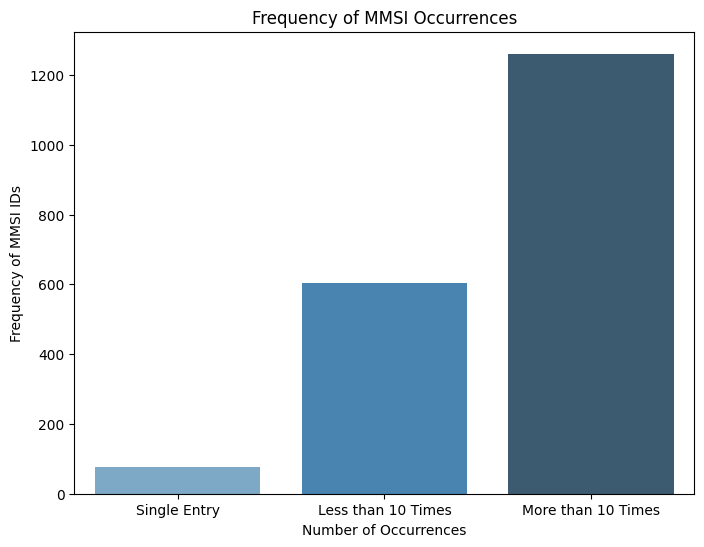

In [37]:
data = pd.DataFrame({
    'Category': ['Single Entry', 'Less than 10 Times', 'More than 10 Times'],
    'Count': [count_one, count_ten, count_more_than_ten]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')

plt.title('Frequency of MMSI Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency of MMSI IDs')
plt.show()

In [38]:
print("Single Entry:", count_one)
print("Less than 10 Entrys:", count_ten)
print("Greater than 10 Entrys:", count_more_than_ten)

Single Entry: 76
Less than 10 Entrys: 605
Greater than 10 Entrys: 1261


In [39]:
df.shape

(99263, 44)

In [40]:
# Assuming 'vessel_df' is your DataFrame and 'MMSI' is the vessel identifier column
# Step 1: Group by the vessel identifier and count occurrences
vessel_counts = df['MMSI'].value_counts()

# Step 2: Filter out vessels that appear only once
vessels_to_keep = vessel_counts[vessel_counts > 1].index

# Step 3: Filter the original dataset to exclude single entry vessels
df = df[df['MMSI'].isin(vessels_to_keep)]

# Print the shape of the original and filtered DataFrame to verify
print(f"Filtered dataset shape: {df.shape}")

Filtered dataset shape: (99187, 44)


In [41]:
id_counts = df['MMSI'].value_counts()

count_one = 0
count_ten = 0
count_more_than_ten = 0

for count in id_counts:
    if count == 1:
        count_one += 1
    elif count < 10:
        count_ten += 1
    else:
        count_more_than_ten += 1

/var/folders/bf/zbss70kn2fq_0xbjk976nwx80000gn/T/ipykernel_51888/77525370.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')


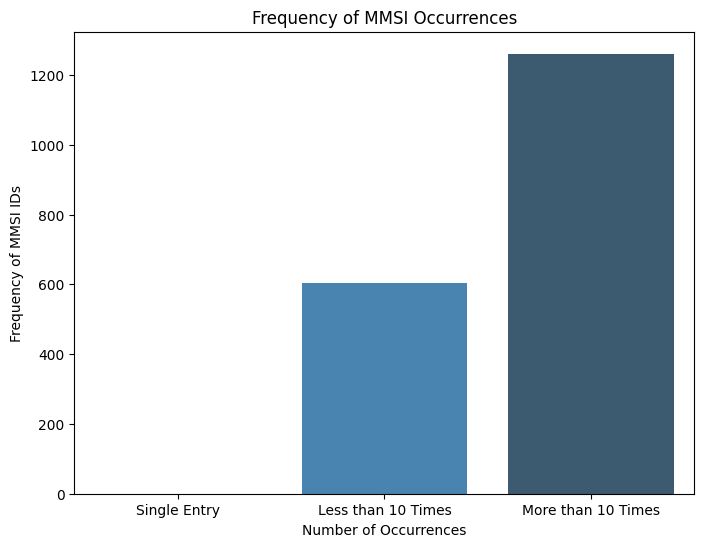

In [42]:
data = pd.DataFrame({
    'Category': ['Single Entry', 'Less than 10 Times', 'More than 10 Times'],
    'Count': [count_one, count_ten, count_more_than_ten]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Count', data=data, palette='Blues_d')

plt.title('Frequency of MMSI Occurrences')
plt.xlabel('Number of Occurrences')
plt.ylabel('Frequency of MMSI IDs')
plt.show()

PathChange
stopped              14602
veered off course    14433
stayed on course     12240
turned around          698
Name: count, dtype: int64

In [43]:
# Drop rows where 'PathChange' is 'stopped'
df = df[df['PathChange'] != 'stopped']

In [44]:
df["PathChange"].value_counts()

PathChange
stayed on course     50456
veered off course    14150
turned around          685
Name: count, dtype: int64

In [45]:
# Combine 'veered off course' and 'turned around' into 'veered off course'
df['PathChange'] = df['PathChange'].replace('turned around', 'veered off course')

In [46]:
df["PathChange"].value_counts()

PathChange
stayed on course     50456
veered off course    14835
Name: count, dtype: int64

In [47]:
df.isna().sum()

Unnamed: 0_x                 0
MMSI                         0
BaseDateTime                 0
LAT                          0
LON                          0
SOG                          0
COG                          0
Heading                      0
VesselName                   0
IMO                          0
CallSign                    38
VesselType                   0
Status                       0
Length                       0
Width                        0
Draft                        0
Cargo                        0
TransceiverClass             0
Unnamed: 0_y                 0
Name                         0
Num Entries                  0
Year                         0
Time                         0
Record Identifier            0
Status of System             0
Latitude                     0
Longitude                    0
Maximum Sustained Wind       0
Minimum Pressure             0
34-knot Wind Radii NE        0
34-knot Wind Radii SE        0
34-knot Wind Radii SW        0
34-knot 

In [48]:
# Drop rows with missing values in the 'CallSign' column
df.dropna(subset=['CallSign'], inplace=True)

In [49]:
df.isna().sum()

Unnamed: 0_x                 0
MMSI                         0
BaseDateTime                 0
LAT                          0
LON                          0
SOG                          0
COG                          0
Heading                      0
VesselName                   0
IMO                          0
CallSign                     0
VesselType                   0
Status                       0
Length                       0
Width                        0
Draft                        0
Cargo                        0
TransceiverClass             0
Unnamed: 0_y                 0
Name                         0
Num Entries                  0
Year                         0
Time                         0
Record Identifier            0
Status of System             0
Latitude                     0
Longitude                    0
Maximum Sustained Wind       0
Minimum Pressure             0
34-knot Wind Radii NE        0
34-knot Wind Radii SE        0
34-knot Wind Radii SW        0
34-knot 

In [50]:
# Calculate the mean of the 'Speed mph' column
mean_speed = df['Speed mph'].mean()

# Impute missing values in the 'Speed mph' column with the mean
df['Speed mph'].fillna(mean_speed, inplace=True)

/var/folders/bf/zbss70kn2fq_0xbjk976nwx80000gn/T/ipykernel_51888/917121572.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Speed mph'].fillna(mean_speed, inplace=True)


In [51]:
df.isna().sum()

Unnamed: 0_x              0
MMSI                      0
BaseDateTime              0
LAT                       0
LON                       0
SOG                       0
COG                       0
Heading                   0
VesselName                0
IMO                       0
CallSign                  0
VesselType                0
Status                    0
Length                    0
Width                     0
Draft                     0
Cargo                     0
TransceiverClass          0
Unnamed: 0_y              0
Name                      0
Num Entries               0
Year                      0
Time                      0
Record Identifier         0
Status of System          0
Latitude                  0
Longitude                 0
Maximum Sustained Wind    0
Minimum Pressure          0
34-knot Wind Radii NE     0
34-knot Wind Radii SE     0
34-knot Wind Radii SW     0
34-knot Wind Radii NW     0
50-knot Wind Radii NE     0
50-knot Wind Radii SE     0
50-knot Wind Radii S

In [52]:
df.head(5)

,Unnamed: 0_x,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,...,50-knot Wind Radii SE,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime,PathChange
0,32035,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.839111,2023-09-01 12:00:00,stayed on course
1,32035,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,90.0,80.0,80.0,30.0,30.0,50.0,50.0,17.228212,2023-09-01 12:00:00,stayed on course
2,32035,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,0.0,0.0,120.0,0.0,0.0,0.0,0.0,17.141051,2023-09-01 12:00:00,stayed on course
3,32035,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,24.935508,2023-09-01 12:00:00,stayed on course
4,32035,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.466720,2023-09-01 12:00:00,stayed on course


In [54]:
df.drop(columns=['Unnamed: 0_x'], inplace=True)

In [55]:
df.shape

(65253, 43)

In [56]:
df.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'TransceiverClass', 'Unnamed: 0_y', 'Name',
       'Num Entries', 'Year', 'Time', 'Record Identifier', 'Status of System',
       'Latitude', 'Longitude', 'Maximum Sustained Wind', 'Minimum Pressure',
       '34-knot Wind Radii NE', '34-knot Wind Radii SE',
       '34-knot Wind Radii SW', '34-knot Wind Radii NW',
       '50-knot Wind Radii NE', '50-knot Wind Radii SE',
       '50-knot Wind Radii SW', '50-knot Wind Radii NW',
       '64-knot Wind Radii NE', '64-knot Wind Radii SE',
       '64-knot Wind Radii SW', '64-knot Wind Radii NW', 'Speed mph',
       'hurricane_datetime', 'PathChange'],
      dtype='object')

In [57]:
df.drop(columns=['Unnamed: 0_y'], inplace=True)

In [58]:
df.head(5)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,50-knot Wind Radii SE,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime,PathChange
0,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.839111,2023-09-01 12:00:00,stayed on course
1,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,90.0,80.0,80.0,30.0,30.0,50.0,50.0,17.228212,2023-09-01 12:00:00,stayed on course
2,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,0.0,120.0,0.0,0.0,0.0,0.0,17.141051,2023-09-01 12:00:00,stayed on course
3,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,24.935508,2023-09-01 12:00:00,stayed on course
4,205104000.0,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.466720,2023-09-01 12:00:00,stayed on course


In [59]:
# Sort the DataFrame by the 'BaseDateTime' column
df = df.sort_values(by='BaseDateTime')

# Optionally, reset the index if needed
df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the sorting
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,50-knot Wind Radii SE,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime,PathChange
0,255805914.0,2020-09-01,34.70562,-75.60953,16.2,52.8,55.0,ITAL CONTESSA,IMO9293806,CQIB6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,2020-09-01 00:00:00,stayed on course
1,636017112.0,2020-09-01,39.42750,-75.52683,14.7,318.0,319.0,POMERENIA SKY,IMO9339583,A8MG6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,2020-09-01 00:00:00,stayed on course
2,249922000.0,2020-09-01,41.58462,-71.28670,0.0,143.2,511.0,OLIVA,IMO9413705,9HA2075,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,2020-09-01 00:00:00,stayed on course
3,220379000.0,2020-09-01,36.92358,-75.92110,6.2,305.6,302.0,GUDRUN MAERSK,IMO9302877,OYAU2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,2020-09-01 00:00:00,stayed on course
4,366235000.0,2020-09-01,32.84996,-79.93852,0.0,0.0,58.0,CAPE DOMINGO,IMO7229423,WMHV,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.811929,2020-09-01 00:00:00,stayed on course


In [60]:
df.to_csv('hurricane_vessel_dataset.csv', index=False)

In [16]:
# Logic
# If the vessel is not impacted by a hurricane and the vessel veers off course, it is likely due to a change in destination
# If the vessel is impacted by a hurricane and veers off course, it is likely due to the hurricane

hurricane_freq = 0 # Number of times a vessel was impacted by a hurricane and drastically changed course
no_hurricane_freq = 0 # Number of times a vessel changed course but was not impacted by a hurricane
stayed_on_course_freq = 0 # Number of times a vessel stayed on course

for i in range(len(df)):
    if df.loc[i, 'PathChange'] != 'stayed on course' and df.loc[i, 'impacted'] == True:
        hurricane_freq += 1
    elif df.loc[i, 'PathChange'] != 'stayed on course':
        no_hurricane_freq += 1
    else:
        stayed_on_course_freq += 1


In [17]:
percent1 = (hurricane_freq / len(df)) * 100
percent2 = (no_hurricane_freq / len(df)) * 100
percent3 = (stayed_on_course_freq / len(df)) * 100

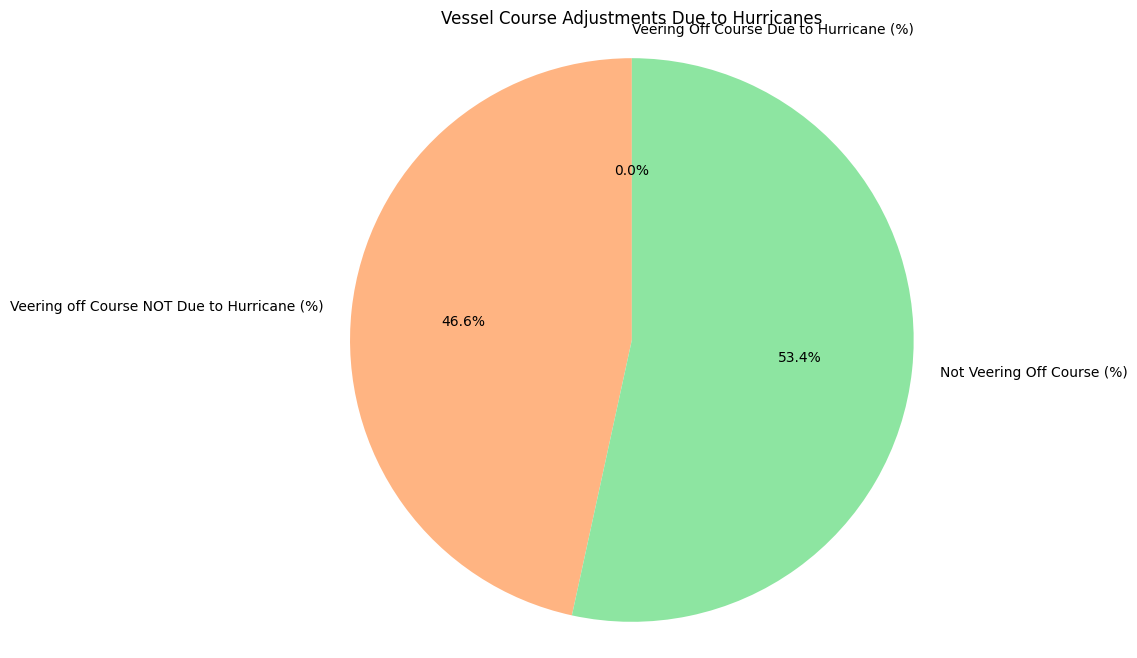

In [18]:
labels = [
    'Veering Off Course Due to Hurricane (%)',
    'Veering off Course NOT Due to Hurricane (%)',
    'Not Veering Off Course (%)'
]
sizes = [percent1, percent2, percent3]
colors = sns.color_palette("pastel")[0:3]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')

plt.title('Vessel Course Adjustments Due to Hurricanes')
plt.show()

In [19]:
print(percent1)
print(percent2)
print(percent3)

0.0
46.58822196734775
53.41177803265226


### **Notes:**
- No requests were made for Trello access.
- Confirmed that the thresholds I set are appropriate.
- But we may need to consider whether a vessel is at a port, as they tend to change direction frequently in the vicinity of a port. 

Questions anwsered
- How often do vessels drastically change their course? In response to hurricanes and without?
- Frequency of vessels in the dataset

- vessel lengths
- not enough vessels being impacted by hurricanes

In [20]:
df.head(5)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime,impacted,PathChange
0,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,0.0,0.0,0.0,0.0,0.0,6.839111,2023-09-01 12:00:00,False,stayed on course
1,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,80.0,80.0,30.0,30.0,50.0,50.0,17.228212,2023-09-01 12:00:00,False,stayed on course
2,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,120.0,0.0,0.0,0.0,0.0,17.141051,2023-09-01 12:00:00,False,stayed on course
3,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,0.0,0.0,0.0,0.0,0.0,24.935508,2023-09-01 12:00:00,False,stayed on course
4,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,0.0,0.0,0.0,0.0,0.0,9.466720,2023-09-01 12:00:00,False,stayed on course


In [21]:
df.shape

(70623, 43)

In [22]:
df.columns

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'TransceiverClass', 'Name', 'Num Entries',
       'Year', 'Time', 'Record Identifier', 'Status of System', 'Latitude',
       'Longitude', 'Maximum Sustained Wind', 'Minimum Pressure',
       '34-knot Wind Radii NE', '34-knot Wind Radii SE',
       '34-knot Wind Radii SW', '34-knot Wind Radii NW',
       '50-knot Wind Radii NE', '50-knot Wind Radii SE',
       '50-knot Wind Radii SW', '50-knot Wind Radii NW',
       '64-knot Wind Radii NE', '64-knot Wind Radii SE',
       '64-knot Wind Radii SW', '64-knot Wind Radii NW', 'Speed mph',
       'hurricane_datetime', 'impacted', 'PathChange'],
      dtype='object')

In [23]:
df.dtypes

MMSI                               int64
BaseDateTime              datetime64[ns]
LAT                              float64
LON                              float64
SOG                              float64
COG                              float64
Heading                          float64
VesselName                        object
IMO                               object
CallSign                          object
VesselType                       float64
Status                           float64
Length                           float64
Width                            float64
Draft                            float64
Cargo                            float64
TransceiverClass                  object
Name                              object
Num Entries                        int64
Year                              object
Time                               int64
Record Identifier                 object
Status of System                  object
Latitude                         float64
Longitude       

In [24]:
df["IMO"]

0        IMO9897559
1        IMO9897559
2        IMO9897559
3        IMO9897559
4        IMO9897559
            ...    
70618    IMO9415399
70619    IMO9415399
70620    IMO9415399
70621    IMO9415399
70622    IMO9415399
Name: IMO, Length: 70623, dtype: object

In [25]:
df.head(5)

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime,impacted,PathChange
0,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,0.0,0.0,0.0,0.0,0.0,6.839111,2023-09-01 12:00:00,False,stayed on course
1,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,80.0,80.0,30.0,30.0,50.0,50.0,17.228212,2023-09-01 12:00:00,False,stayed on course
2,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,120.0,0.0,0.0,0.0,0.0,17.141051,2023-09-01 12:00:00,False,stayed on course
3,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,0.0,0.0,0.0,0.0,0.0,24.935508,2023-09-01 12:00:00,False,stayed on course
4,205104000,2023-09-01 12:00:00,25.4941,-79.57856,18.7,11.1,14.0,FLANDERS PIONEER,IMO9897559,ONKU,...,0.0,0.0,0.0,0.0,0.0,0.0,9.466720,2023-09-01 12:00:00,False,stayed on course


In [27]:
# Sort the DataFrame by the 'BaseDateTime' column
df = df.sort_values(by='BaseDateTime')

# Optionally, reset the index if needed
df.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the sorting
df.head()

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,...,50-knot Wind Radii SW,50-knot Wind Radii NW,64-knot Wind Radii NE,64-knot Wind Radii SE,64-knot Wind Radii SW,64-knot Wind Radii NW,Speed mph,hurricane_datetime,impacted,PathChange
0,563135300,2022-08-31 12:00:00,32.11997,-79.93341,0.0,270.9,179.0,WAN HAI 625,IMO9298997,9V7324,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course
1,636092896,2022-08-31 12:00:00,40.49470,-73.66555,0.1,299.4,299.0,CCNI ANGOL,IMO9683867,D5GZ4,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course
2,373457000,2022-08-31 12:00:00,36.62089,-75.54031,11.2,336.6,337.0,MOL MAESTRO,IMO9415727,3EKT9,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course
3,211779000,2022-08-31 12:00:00,27.72167,-78.49475,22.2,255.3,253.0,NORTHERN MAJESTIC,IMO9252565,DCPP2,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course
4,636021760,2022-08-31 12:00:00,36.14663,-74.65842,17.5,12.7,12.0,MSC TAMPA,IMO9317925,5LFN8,...,0.0,0.0,0.0,0.0,0.0,0.0,11.784165,2022-08-31 12:00:00,False,stayed on course


In [29]:
df.to_csv('merged_hurricane_vessel.csv', index=False)